### Titanic task by: kareem emad

In [1]:
# get the important libraries for our research, initially.
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

#### load .csv data file

In [2]:
%matplotlib inline

In [4]:
X = pd.read_csv('datasets/titanicd/train.csv')
X_test =  pd.read_csv('datasets/titanicd/test.csv')

In [5]:
# take a quick look at the data structure to gain insights.
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
X.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
X.info() # basic knowledge about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
X.describe() # to detect numerical attributes

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
X[X.SibSp==8] # they have the same surname as 'Sage' so they may be of the same family and all have the same tickect number.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [206]:
X.Name.value_counts()

Hays, Mrs. Charles Melville (Clara Jennings Gregg)      1
Stahelin-Maeglin, Dr. Max                               1
Ilmakangas, Miss. Pieta Sofia                           1
Scanlan, Mr. James                                      1
Lindell, Mr. Edvard Bengtsson                           1
                                                       ..
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
Knight, Mr. Robert J                                    1
Humblen, Mr. Adolf Mathias Nicolai Olsen                1
Dimic, Mr. Jovan                                        1
Pettersson, Miss. Ellen Natalia                         1
Name: Name, Length: 891, dtype: int64

In [207]:
X[X.Parch==6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


In [208]:
X[(X.SibSp>0) & (X.Survived==0)] # trying to detect the relationship between the no. of sibiling/spoues and the passenger being survived or not.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [209]:
X[(X.Parch>0) & (X.Survived==0)] # trying to detect the relationship between the no. of parent/children and the passenger being survived or not.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [210]:
X[(X.Parch>0) & (X.SibSp>0) & (X.Survived==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [211]:
X[(X.Parch==0) & (X.SibSp==0) & (X.Survived==0)].Pclass.value_counts() # passengers of the third class were not able to survive more than the other two classes. 

3    255
2     68
1     51
Name: Pclass, dtype: int64

3    372
2     97
1     80
Name: Pclass, dtype: int64

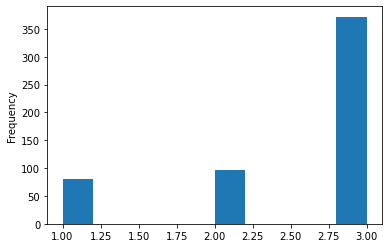

In [212]:
X[X.Survived==0].Pclass.plot(kind='hist') # of course the 3rd class was not able to survive more.
X[X.Survived==0].Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

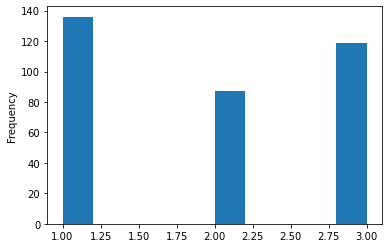

In [213]:
X[X.Survived==1].Pclass.plot(kind='hist') # of course the 1st class was able to survive more.
X[X.Survived==1].Pclass.value_counts()

In [214]:
X[(X.Cabin.notna()) & (X.Pclass==3)] # we want to know for class 1, which cabins were available more.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


In [215]:
X[(X.Cabin.notna()) & (X.Pclass==2)] # we want to know for class 1, which cabins were available more.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S


In [216]:
idx = list(np.random.permutation(10))
X[(X.Cabin.notna()) & (X.Pclass==1)].iloc[idx] # we want to know for class 1, which cabins were available more.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [217]:
X[(X.Cabin.isna()) & (X.Pclass==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


### If the passenger hadn't had a cabin, that passenger was more subjected to not survive.

0    481
1    206
Name: Survived, dtype: int64

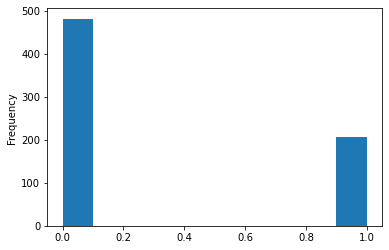

In [218]:
# of all those who didn't have cabins, the frequency of those who hadn't survived ?
X[(X.Cabin.isna())].Survived.plot(kind='hist')
X[(X.Cabin.isna())].Survived.value_counts()

1    136
0     68
Name: Survived, dtype: int64

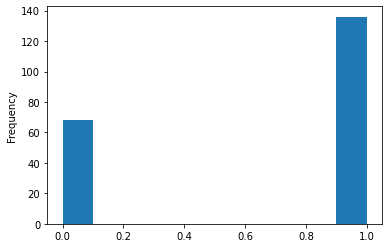

In [219]:
# of all those who had cabins, the frequency of those who had survived ?
X[(X.Cabin.notna())].Survived.plot(kind='hist')
X[(X.Cabin.notna())].Survived.value_counts()

In [220]:
idx = np.random.permutation(30)
X[(X.Cabin.isna()) & (X.Embarked=='S')].iloc[idx, range(1, len(list(X)))]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
45,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
50,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
35,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
49,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
63,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
53,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S


In [221]:
import regex as re

In [6]:
X_ = X.copy()

In [195]:
num_attr = X_.describe().columns
num_attr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
# Extract the tickect class column
tick_cat = [re.split(r' ', X_.Ticket[cat])[0] if (len(re.split(r'[ ]', X_.Ticket[cat]))>1) else np.NaN for cat in range(len(X_.Ticket))]
X_['TickCat'] = tick_cat # so we added the ticket category successfully after being extracted.

In [545]:
X_ = X.copy()

In [546]:
# Extract the tickect number column
tick_no = []
for no in range(len(X_.Ticket)):
    temp_list = re.split(r' ', X_.Ticket[no])
    if (len(temp_list)==1):         # only 1 item
       tick_no.append(temp_list[0])
    elif (len(temp_list)>1):        # 2 or more items
       tick_no.append(temp_list[-1]) 

X_['TickNo'] = tick_no # so we added the ticket number successfully after being extracted.

In [224]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  TickNo       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


### it's the time to create the attribute to indicate if the passenger was a member of a family or not with the attribute of the number of his/her family members.

In [234]:
family_size = []
for i in range(X_.shape[0]):
    size = X_.SibSp[i] + X_.Parch[i]
    family_size.append(size)

In [235]:
X_['FamilySize'] = family_size

In [236]:
X_.iloc[0:2, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TickNo,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17599,1


In [237]:
idx = np.random.permutation(20)
X_.iloc[idx, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TickNo,FamilySize
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,349909,4
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,237736,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,2649,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,330877,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,373450,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17599,1
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,347082,6
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,382652,5
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,9549,2
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,244373,0


In [238]:
X_.iloc[88, :]

PassengerId                            89
Survived                                1
Pclass                                  1
Name           Fortune, Miss. Mabel Helen
Sex                                female
Age                                    23
SibSp                                   3
Parch                                   2
Ticket                              19950
Fare                                  263
Cabin                         C23 C25 C27
Embarked                                S
TickNo                              19950
FamilySize                              5
Name: 88, dtype: object

In [239]:
X_[(X_.TickNo=='364516')] #113803, 364516, 19950

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TickNo,FamilySize
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.475,NaN,S,364516,0
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S,364516,0


In [240]:
X_Nan_Cabin = X_[X_.Cabin.isna()] #113803, 364516, 19950
X_Cabin = X_[X_.Cabin.notna()]

### we can deduce that `most` of those who have no cabin data, were having zero family size.
With a percent of: 443/687=64.5%

In [241]:
X_Nan_Cabin[X_Nan_Cabin.FamilySize==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TickNo,FamilySize
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,373450,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,330877,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,2151,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,350406,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,7552,0
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,34068,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,392076,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,211536,0


### Let's investigate the passengers with cabin data and their family sizes relationship

In [242]:
X_Cabin[X_Cabin.FamilySize>0] # 244/687 = 35%

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TickNo,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17599,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,113803,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,9549,2
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,19950,5
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,17569,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,17756,2
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,17453,1
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,17592,1
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,11751,2


In [243]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  TickNo       891 non-null    object 
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [244]:
X_[X_.TickNo=='19950']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TickNo,FamilySize
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,19950,5
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,19950,5
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,19950,5
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,19950,5


In [245]:
X_.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TickNo,FamilySize
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,211536,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,112053,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,6607,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,111369,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,370376,0


In [247]:
idx = np.random.permutation(10)
X_Cabin[X_Cabin.Pclass==1].Cabin.iloc[idx] # subset of the unique cabins of class1

54            B30
55            C52
11           C103
31            B78
27    C23 C25 C27
23             A6
1             C85
52            D33
3            C123
6             E46
Name: Cabin, dtype: object

### We try here to extract useful information from the cabin number attribute although it has about 70% null values, but through investigation we could deduce that most of those who had had cabins were of class 1 and the least class was class 3 such that class 1 was able to survive the most

In [249]:
cabin_reserved = []
cabin_level = []
for i in range(X_.shape[0]):
    if (type(X_.Cabin.iloc[i])==float):
       cabin_level.append('H') # H level means that the passenger hadn't had a cabin on the titanic.
       cabin_reserved.append(0)
    else:
        cabin_level.append((X_.Cabin.iloc[i])[0])
        cabin_reserved.append(len(X_.Cabin.iloc[i].split(' ')))

In [250]:
X_['CabinReserved'] = cabin_reserved
X_['CabinLevel'] = cabin_level

In [254]:
X_.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TickNo,FamilySize,CabinReserved,CabinLevel
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,211536,0,0,H
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,112053,0,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,6607,3,0,H
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,111369,0,1,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,370376,0,0,H


### We want to add an attribute of the no. of survived passengers for each ticket number, because we observed that some ticket numbers were repeated and all families were having the same ticket id.

In [277]:
# let's check the effect of the ticket id on the survival if any.
X_having_family = X_[X_.FamilySize>0]
X_having_family[X_having_family.TickNo=='6607'].Survived.describe()[0]

2.0

In [13]:
X_ = X.copy()

### drop now unnecessary attributes.

In [ ]:
X_.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [14]:
X_.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [308]:
X_.Embarked.iloc[61], X_.Embarked.iloc[829]

('S', 'S')

In [304]:
X_.Embarked.iloc[61] = X_.Embarked.value_counts().index[0]
X_.Embarked.iloc[829] = X_.Embarked.value_counts().index[0]

C:\Users\kaban\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [305]:
X_.info()
X_[X_.Embarked.isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    object 
 3   Age             714 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Embarked        891 non-null    object 
 8   TickNo          891 non-null    object 
 9   FamilySize      891 non-null    int64  
 10  CabinReserved   891 non-null    int64  
 11  CabinLevel      891 non-null    object 
 12  TickNoSurvived  891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TickNo,FamilySize,CabinReserved,CabinLevel,TickNoSurvived


In [303]:
X_.Embarked.value_counts().index[0] # the most frequent attribute is 'S': Southapton.

Index(['S', 'C', 'Q'], dtype='object')

In [316]:
med_X_ = X_.Age.median()
X_.Age.fillna(value=med_X_, inplace=True)# 177 null attributes

In [317]:
X_[X_.Age.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TickNo,FamilySize,CabinReserved,CabinLevel,TickNoSurvived


In [318]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    object 
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Embarked        891 non-null    object 
 8   TickNo          891 non-null    object 
 9   FamilySize      891 non-null    int64  
 10  CabinReserved   891 non-null    int64  
 11  CabinLevel      891 non-null    object 
 12  TickNoSurvived  891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [319]:
X_.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,CabinReserved,TickNoSurvived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602,0.267116,0.891134
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459,0.547134,1.254403
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,4.000000,7.000000


In [322]:
X[X.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [323]:
X_

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TickNo,FamilySize,CabinReserved,CabinLevel,TickNoSurvived
0,0,3,male,22.0,1,0,7.2500,S,21171,1,0,H,0
1,1,1,female,38.0,1,0,71.2833,C,17599,1,1,C,1
2,1,3,female,26.0,0,0,7.9250,S,3101282,0,0,H,1
3,1,1,female,35.0,1,0,53.1000,S,113803,1,1,C,2
4,0,3,male,35.0,0,0,8.0500,S,373450,0,0,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,211536,0,0,H,0
887,1,1,female,19.0,0,0,30.0000,S,112053,0,1,B,1
888,0,3,female,28.0,1,2,23.4500,S,6607,3,0,H,0
889,1,1,male,26.0,0,0,30.0000,C,111369,0,1,C,1


In [336]:
X_.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,CabinReserved,CabinLevel,TickNoSurvived
0,0,3,male,22.0,1,0,7.2500,S,1,0,H,0
1,1,1,female,38.0,1,0,71.2833,C,1,1,C,1
2,1,3,female,26.0,0,0,7.9250,S,0,0,H,1
3,1,1,female,35.0,1,0,53.1000,S,1,1,C,2
4,0,3,male,35.0,0,0,8.0500,S,0,0,H,0


In [337]:
# store the final cleaned dataframe
X_.to_csv('../datasets/titanicd/cleaned.csv', index=False)

In [338]:
y = pd.read_csv('../datasets/titanicd/cleaned.csv')

In [339]:
y.describe().columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'CabinReserved', 'TickNoSurvived'],
      dtype='object')

In [347]:
y.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,CabinReserved,CabinLevel,TickNoSurvived
0,0,3,male,22.0,1,0,7.2500,S,1,0,H,0
1,1,1,female,38.0,1,0,71.2833,C,1,1,C,1
2,1,3,female,26.0,0,0,7.9250,S,0,0,H,1
3,1,1,female,35.0,1,0,53.1000,S,1,1,C,2
4,0,3,male,35.0,0,0,8.0500,S,0,0,H,0


In [345]:
X[X.Ticket=='111369']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


### Start ML algorithm data preparation

#### we need to implement a pipeline to implement the numerical transformations and the categorical transformations:
* **Numerical transformations:**<br>
  1- create the column `FamilySize` = SibSp+Parch<br>
  
* **Categorical transformations:**<br>
  2- split the Cabin attribute into the `CabinLevel` that refers to the class of the cabin such that it will be 'H' in case that passenger hadn't had cabins also I will create the `CabinReserved` as a counter of the number of cabins reserved by the passenger as I discovered that some passengers reserved multiple cabins.<br>
  3- extract the ticket number<br>
  4- use that extracted ticket number to investigate the number of passengers who could survive for each ticket number.<br>
  5- fill missing values using simple imputer transformer for both numerical and categorical attributes.<br>
  6- encode the attributes: `Sex`, `CabinLevel`, `Embarked` as OneHotEncoder beacause those attributes aren't ordinal.

In [16]:
X_.shape

(891, 12)

In [17]:
num_attr = list(X.describe())
cat_attr = list(set(list(X))-set(num_attr))
X_num = X[num_attr]
X_cat = X[cat_attr]

In [18]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [19]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Cabin     204 non-null    object
 2   Embarked  889 non-null    object
 3   Sex       891 non-null    object
 4   Ticket    891 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
from sklearn.base import BaseEstimator, TransformerMixin # TransformerMixin to allow the transformer hyperparameters.

In [22]:
Sib_idx = 2
Parch_idx = 3

class column_adder(BaseEstimator, TransformerMixin):
      def __init__(self, selector=True):
          self.selector = selector
      def fit(self, X, y=None): # it takes the dataframe as a numpy object: in this method you run the needed functions and computations
          return self
      def transform(self, X, y=None):
          X = X.values # to be sure that it's a numpy array.
          if (self.selector):
              FamilySize = X[:, Sib_idx]+X[:, Parch_idx] 
              return np.c_[X, FamilySize] # concatenate the numpy array columns
          else:
                return X

#### let's define a transformer to fill missing values in categorical attribute_ ' `Embarked`

In [23]:
idx_embarked = 1

def get_mode(S):
    mode = S.value_counts().index[0] # by default, the index=unique values of the whole series, it sorts it's frequency descendingly.
    return mode

def fill_with_mode(mode, S):
    S_ = S.fillna(mode)
    return S_

class fillwithmode(BaseEstimator, TransformerMixin):
      def __init__(self, selector=True):
            self.selector=selector
      def fit(self, X, y=None):
          embarkd_numpy = X.iloc[:, idx_embarked]
          embarkd_series = pd.Series(embarkd_numpy)
          self.mode = get_mode(embarkd_series)
          self.embarkd_numpy_ = np.array(fill_with_mode(self.mode, embarkd_series))
          return self
      def transform(self, X, y=None):
#            X = X.values
           if self.selector:
                X.iloc[:, idx_embarked] = self.embarkd_numpy_
           return np.c_[X.iloc[:, 0], X.iloc[:, idx_embarked]]

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# test the column_adder transformer
add = column_adder()
# X_num_ = add.fit_transform(np.array(X_num_))

In [36]:
X[X.Cabin=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [39]:
cat_attr, '' ,num_attr

(['Name', 'Cabin', 'Embarked', 'Sex', 'Ticket'],
 '',
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [40]:
from sklearn.impute import SimpleImputer

In [42]:
attrs = list(X_)

In [43]:
attrs

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [44]:
num_attr, cat_attr

(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Name', 'Cabin', 'Embarked', 'Sex', 'Ticket'])

In [45]:
cat_attr, num_attr

(['Name', 'Cabin', 'Embarked', 'Sex', 'Ticket'],
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [46]:
X_num_attr = X[num_attr]

In [47]:
# we have to focus ainly on the (fare, Parch) -> +ve relation, (Age, Passenger Class) attributes ->(-ve relation.)

In [48]:
corr_mat = X_num_attr.corr()
corr_mat.loc['Survived', :].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000270C6D63460>,
      dtype=object)

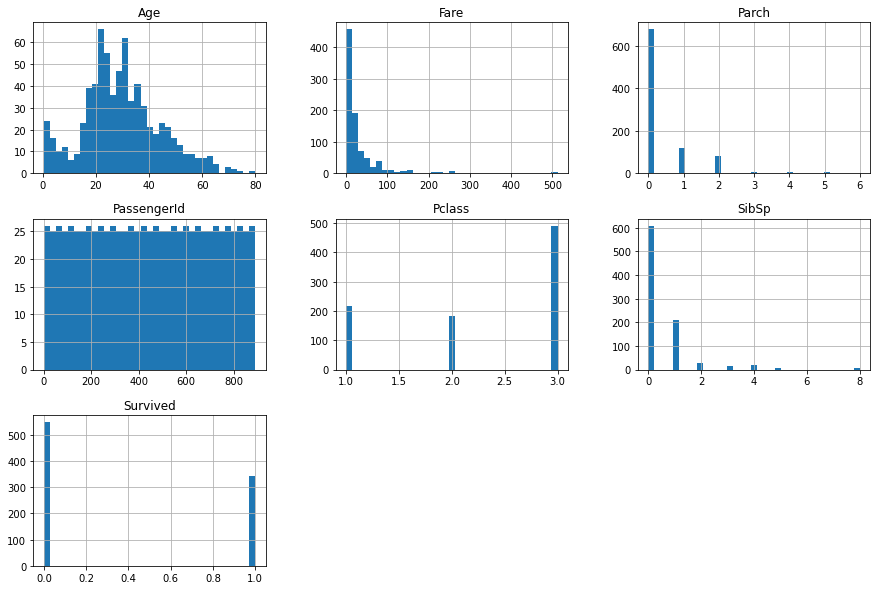

In [49]:
X_num_attr.hist(figsize=(15, 10), bins=35)

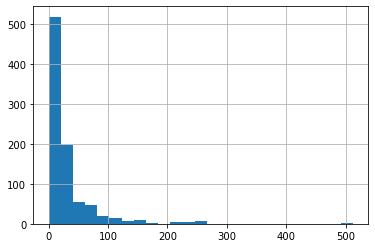

In [51]:
X_num_attr.Fare.hist(bins=25)
# X_num_attr.Pclass.hist()

### We can see that the fare is linearly correlated with the survived attribute with about 25% positive correlation
So, as we can see that the fare is positively skewed, so we will standardize the distribution of the fare attribute.

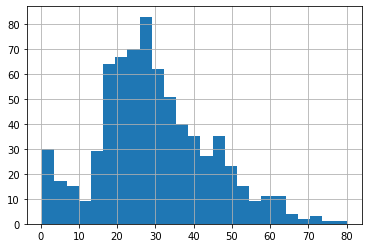

In [52]:
X_num_attr.Age.hist(bins=25)

### It's obvious that the `survived` attribute is highly `negtaviely` related with the` Passenger class `and this is recognized before that `68% `of those who` didn't survive `were from `class 3` out of 549.

Survived attribute is highly positively related with the Fare attribute.

In [53]:
# we want to highly investigate the fare attribute and the passenger class attributes.

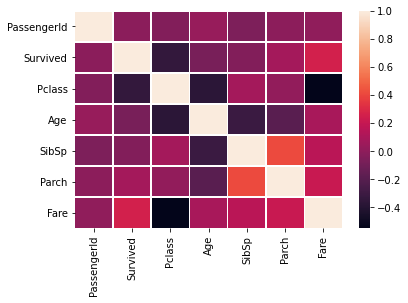

In [54]:
sns.heatmap(corr_mat, linewidths=0.5)

In [110]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
# here we take the target label away for preparing for our training algorithm.
y_train = X.Survived.copy()
X_ = X.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [56]:
num_attr = list(X_.describe())
cat_attr = ['Sex', 'Embarked']

In [57]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [135]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [136]:
pipe_num = Pipeline([
    ('coladd', column_adder(selector=True)),
    ('missValue', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
])

In [137]:
# create a pipeline to integrate the categorical transformations together.

pipe_cat = Pipeline([
    ('getModeEmbakd', fillwithmode(selector=True)),
    ('encode', OneHotEncoder())
])

In [138]:
# define the column transformer to combine the output of the cat/num transformers.
from sklearn.compose import ColumnTransformer
# by specifying the list of attributes to be selected, 
#the transformer automatically selects them and creates a numpy array with those columns specified only to be used in computations.

full_pipeline = ColumnTransformer([
    ('est1', pipe_num, num_attr),
    ('est2', pipe_cat, cat_attr)
])

In [112]:
X_.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [139]:
X_.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.25,S


In [140]:
X_train.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,CabinReserved,CabinLevel,TickNoSurvived,Age_cut
0,3,male,22.0,1,0,7.25,S,1,0,H,0,2


In [64]:
ml_final_data = full_pipeline.fit_transform(X_)

In [65]:
num_attr, cat_attr

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [111]:
ml_final_data[0]

array([ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517,
        0.05915988,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ])

In [68]:
len(ml_final_data[:, 8][ml_final_data[:, 8]==np.nan])

0

In [108]:
ml_final_data.shape

(891, 11)

### Let's train the Random forest classifier

In [70]:
y_train = np.array(y_train)

In [71]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier()

In [74]:
model_RFC.fit(ml_final_data, y_train)

RandomForestClassifier()

In [75]:
# evaluate the model predictions on training dataset
RFC_pred_one_round = model_RFC.predict(ml_final_data)

In [76]:
from sklearn.metrics import accuracy_score
acc_score_RFC = accuracy_score(y_train, RFC_pred_one_round)

### We got ~ 98% accuracy on the training dataset
it's time to evaluate the model accuracy over multiple rounds assume 5 rounds of training and evaluation to check the overfitting problem

In [77]:
acc_score_RFC

0.9797979797979798

In [78]:
from sklearn.model_selection import cross_val_score

cross_RFC_evaluate = cross_val_score(model_RFC, ml_final_data, y_train, cv=5, scoring='accuracy')

In [79]:
cross_RFC_evaluate.mean()

0.8092021844203126

### finally we got ~81.5% accuracy over multiple training rounds
it's the time to `fine-tune` our model

In [80]:
num_attr, cat_attr

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [81]:
ml_final_data.shape

(891, 11)

In [82]:
from sklearn.model_selection import GridSearchCV
model_RFC = RandomForestClassifier()

params_grid = [
    {'n_estimators':[5, 10, 50, 100, 200, 300, 400, 500], 'max_features':[2, 4, 6, 8, 10, 11]},
    {'bootstrap':[False], 'n_estimators':[250, 450, 550], 'max_features':[1, 3, 5, 7, 9]}
]

grid_RFC = GridSearchCV(model_RFC, params_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=2)

In [83]:
grid_RFC.fit(ml_final_data, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] max_features=2, n_estimators=5 ..................................
[CV] ................... max_features=2, n_estimators=5, total=   0.0s
[CV] max_features=2, n_estimators=5 ..................................
[CV] ................... max_features=2, n_estimators=5, total=   0.0s
[CV] max_features=2, n_estimators=5 ..................................
[CV] ................... max_features=2, n_estimators=5, total=   0.0s
[CV] max_features=2, n_estimators=5 ..................................
[CV] ................... max_features=2, n_estimators=5, total=   0.0s
[CV] max_features=2, n_estimators=5 ..................................
[CV] ................... max_features=2, n_estimators=5, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.0s
[CV] max_features=2, n_estimators=50 .................................
[CV] .................. max_features=2, n_estimators=50, total=   0.1s
[CV] max_features=2, n_estimators=50 .................................
[CV] .................. max_features=2, n_estimators=50, total=   0.1s
[CV] max_features=2, n_estimators=50 .................................
[CV] .................. max_features=2, n_estimators=50, total=   0.1s
[CV] max_features=2, n_estimators=50 .................................
[CV] .................. max_features=2, n_estimators=50, total=   0.1s
[CV] max_features=2, n_estimators=50 .................................
[CV] .................. max_features=2, n_estimators=50, total=   0.1s
[CV] 

[CV] ................. max_features=4, n_estimators=300, total=   0.7s
[CV] max_features=4, n_estimators=300 ................................
[CV] ................. max_features=4, n_estimators=300, total=   0.7s
[CV] max_features=4, n_estimators=300 ................................
[CV] ................. max_features=4, n_estimators=300, total=   0.6s
[CV] max_features=4, n_estimators=300 ................................
[CV] ................. max_features=4, n_estimators=300, total=   0.6s
[CV] max_features=4, n_estimators=400 ................................
[CV] ................. max_features=4, n_estimators=400, total=   0.8s
[CV] max_features=4, n_estimators=400 ................................
[CV] ................. max_features=4, n_estimators=400, total=   0.8s
[CV] max_features=4, n_estimators=400 ................................
[CV] ................. max_features=4, n_estimators=400, total=   1.0s
[CV] max_features=4, n_estimators=400 ................................
[CV] .

[CV] .................. max_features=8, n_estimators=10, total=   0.0s
[CV] max_features=8, n_estimators=10 .................................
[CV] .................. max_features=8, n_estimators=10, total=   0.0s
[CV] max_features=8, n_estimators=10 .................................
[CV] .................. max_features=8, n_estimators=10, total=   0.0s
[CV] max_features=8, n_estimators=10 .................................
[CV] .................. max_features=8, n_estimators=10, total=   0.0s
[CV] max_features=8, n_estimators=50 .................................
[CV] .................. max_features=8, n_estimators=50, total=   0.1s
[CV] max_features=8, n_estimators=50 .................................
[CV] .................. max_features=8, n_estimators=50, total=   0.1s
[CV] max_features=8, n_estimators=50 .................................
[CV] .................. max_features=8, n_estimators=50, total=   0.1s
[CV] max_features=8, n_estimators=50 .................................
[CV] .

[CV] ................ max_features=10, n_estimators=200, total=   0.5s
[CV] max_features=10, n_estimators=300 ...............................
[CV] ................ max_features=10, n_estimators=300, total=   0.9s
[CV] max_features=10, n_estimators=300 ...............................
[CV] ................ max_features=10, n_estimators=300, total=   0.8s
[CV] max_features=10, n_estimators=300 ...............................
[CV] ................ max_features=10, n_estimators=300, total=   0.8s
[CV] max_features=10, n_estimators=300 ...............................
[CV] ................ max_features=10, n_estimators=300, total=   0.8s
[CV] max_features=10, n_estimators=300 ...............................
[CV] ................ max_features=10, n_estimators=300, total=   0.9s
[CV] max_features=10, n_estimators=400 ...............................
[CV] ................ max_features=10, n_estimators=400, total=   1.0s
[CV] max_features=10, n_estimators=400 ...............................
[CV] .

[CV]  bootstrap=False, max_features=1, n_estimators=250, total=   0.5s
[CV] bootstrap=False, max_features=1, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=1, n_estimators=250, total=   0.4s
[CV] bootstrap=False, max_features=1, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=1, n_estimators=250, total=   0.5s
[CV] bootstrap=False, max_features=1, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=1, n_estimators=450, total=   0.9s
[CV] bootstrap=False, max_features=1, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=1, n_estimators=450, total=   0.8s
[CV] bootstrap=False, max_features=1, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=1, n_estimators=450, total=   0.8s
[CV] bootstrap=False, max_features=1, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=1, n_estimators=450, total=   0.8s
[CV] bootstrap=False, max_features=1, n_estimators=450 ...............
[CV]  

[CV]  bootstrap=False, max_features=9, n_estimators=250, total=   0.7s
[CV] bootstrap=False, max_features=9, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=250, total=   0.6s
[CV] bootstrap=False, max_features=9, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=250, total=   0.6s
[CV] bootstrap=False, max_features=9, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=250, total=   0.7s
[CV] bootstrap=False, max_features=9, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=250, total=   0.8s
[CV] bootstrap=False, max_features=9, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=450, total=   1.2s
[CV] bootstrap=False, max_features=9, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=450, total=   1.3s
[CV] bootstrap=False, max_features=9, n_estimators=450 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:  3.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 11],
                          'n_estimators': [5, 10, 50, 100, 200, 300, 400, 500]},
                         {'bootstrap': [False], 'max_features': [1, 3, 5, 7, 9],
                          'n_estimators': [250, 450, 550]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [84]:
grid_RFC.best_params_

{'max_features': 4, 'n_estimators': 10}

In [86]:
grid_RFC.best_score_

0.8193396522503296

### By `grid search` with the `random forest classifier`, we reached an accuracy of `81.82`% on multiple rounds of the cross validation.

In [87]:
scores = grid_RFC.cv_results_
scores

{'mean_fit_time': array([0.01339154, 0.02553229, 0.09998202, 0.18305354, 0.47098117,
        0.67272401, 0.78426108, 1.06575928, 0.00624957, 0.02187424,
        0.10654707, 0.20440335, 0.43232722, 0.64512429, 0.80918603,
        1.1132587 , 0.01562428, 0.02598577, 0.1063241 , 0.23479753,
        0.42820749, 0.64058108, 0.85405936, 1.09062943, 0.01739039,
        0.02592115, 0.11453829, 0.24418468, 0.46728883, 0.74266133,
        0.95440941, 1.11869798, 0.01562448, 0.02531104, 0.11969347,
        0.24162536, 0.49660645, 0.78026853, 1.15587282, 1.19063339,
        0.01562419, 0.02767072, 0.1174933 , 0.2512907 , 0.50390153,
        0.72151809, 0.95615392, 1.21297827, 0.42493773, 0.77332191,
        0.99438539, 0.44932246, 0.82229176, 0.99678359, 0.54306364,
        0.8982451 , 1.07408352, 0.52072558, 1.09294181, 1.31692705,
        0.62395916, 1.2118978 , 1.30320058]),
 'std_fit_time': array([1.49572234e-03, 3.17598245e-03, 1.39778952e-02, 3.98944197e-03,
        1.34183157e-01, 9.4255295

In [88]:
for acc, para in zip(scores['mean_test_score'], scores['params']):
    print('acc: %f'%acc, 'params: %s'%para)

acc: 0.782299 params: {'max_features': 2, 'n_estimators': 5}
acc: 0.796887 params: {'max_features': 2, 'n_estimators': 10}
acc: 0.799127 params: {'max_features': 2, 'n_estimators': 50}
acc: 0.813697 params: {'max_features': 2, 'n_estimators': 100}
acc: 0.809215 params: {'max_features': 2, 'n_estimators': 200}
acc: 0.808104 params: {'max_features': 2, 'n_estimators': 300}
acc: 0.808097 params: {'max_features': 2, 'n_estimators': 400}
acc: 0.804739 params: {'max_features': 2, 'n_estimators': 500}
acc: 0.795763 params: {'max_features': 4, 'n_estimators': 5}
acc: 0.819340 params: {'max_features': 4, 'n_estimators': 10}
acc: 0.815937 params: {'max_features': 4, 'n_estimators': 50}
acc: 0.809240 params: {'max_features': 4, 'n_estimators': 100}
acc: 0.812598 params: {'max_features': 4, 'n_estimators': 200}
acc: 0.809234 params: {'max_features': 4, 'n_estimators': 300}
acc: 0.811462 params: {'max_features': 4, 'n_estimators': 400}
acc: 0.814833 params: {'max_features': 4, 'n_estimators': 500}


### lets's investigate the confusion matrix of our grid search classifier.

In [89]:
pred_grid_train = grid_RFC.predict(ml_final_data)

In [91]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, pred_grid_train)

array([[543,   6],
       [ 23, 319]], dtype=int64)

so our model failed in 18 to predict successfully for 18 examples
1. `6 examples` of `False positive` in which the model says that those passengers `survived` although `they didn't`.
2. `23 examples` of `False negative` in which the model says that those passengers `died` although they `survived!`

### Let's investigate the model accuracy on the testing dataset.

In [92]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
# let's transform our testing dataset.

In [1103]:
X_test_ = X_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [1104]:
X_test_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [1106]:
X_test_final = full_pipeline.fit_transform(X_test_)

In [1111]:
ml_final_data[:10, :]

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517,
         0.05915988,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529,
         0.05915988,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426,
        -0.56097483,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.56610693,  0.4333115 ,  0.43279337, -0.47367361,  0.42073024,
         0.05915988,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.82737724,  0.4333115 , -0.4745452 , -0.47367361, -0.48633742,
        -0.56097483,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , -0.47367361, -0.47811643,
        -0.56097483,  0.        ,  1.        ,  0.        ,  1.        ,
         0.   

In [1116]:
X_test_final[:10, :]

array([[ 0.87348191,  0.38623105, -0.49947002, -0.4002477 , -0.49741333,
        -0.5534426 ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.87348191,  1.37137004,  0.61699237, -0.4002477 , -0.51227801,
         0.10564289,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.31581919,  2.55353683, -0.49947002, -0.4002477 , -0.46410047,
        -0.5534426 ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.87348191, -0.20485235, -0.49947002, -0.4002477 , -0.48247516,
        -0.5534426 ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.87348191, -0.59890794,  0.61699237,  0.61989583, -0.4174915 ,
         0.76472838,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.87348191, -1.2293969 , -0.49947002, -0.4002477 , -0.47239149,
        -0.5534426 ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.   

In [1117]:
grid_RFC_pred_testing = grid_RFC.predict(X_test_final)

In [1118]:
grid_RFC_pred_testing

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1120]:
sample_output = pd.read_csv('../datasets/titanicd/gender_submission.csv')

In [1215]:
sample_output.iloc[325, :]

PassengerId    1217
Survived          0
Name: 325, dtype: int64

In [1204]:
sample_output.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [1125]:
output.shape

(418, 2)

In [1128]:
sample_output.Survived.values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1129]:
### Let's test our model considering that the sample of output to be the ground truth although it's not, but for fun!

In [1130]:
confusion_matrix(sample_output.Survived.values, grid_RFC_pred_testing)

array([[235,  31],
       [ 40, 112]], dtype=int64)

In [1132]:
235+112, 347/418

(347, 0.8301435406698564)

So, our accuracy if we considered that the sample output to be the ground truth is:
235+112=347 of correctly predicted output and an accuracy of ~ 83% on testing dataset.

In [1133]:
model_RFC = RandomForestClassifier(**grid_RFC.best_params_)

In [1134]:
model_RFC

RandomForestClassifier(max_features=6, n_estimators=400)

In [1181]:
model_RFC.fit(ml_final_data, y_train)

RandomForestClassifier(max_features=6, n_estimators=400)

In [1182]:
final_preds = model_RFC.predict(X_test_final)

In [1190]:
output = np.c_[X_test.PassengerId.values, final_preds] # this is my predictions

In [1183]:
# confusion Matrix
confusion_matrix(sample_output.Survived.values, final_preds)

array([[236,  30],
       [ 38, 114]], dtype=int64)

In [1184]:
236+114, (236+114)/418

(350, 0.8373205741626795)

**Precision**: 114/144 ~79% <br>
**Recall**: 114/152     75%

### Overall of accuracy  83.73%
We can now save our final model.


In [1188]:
import joblib

joblib.dump(model_RFC, 'model_RFC_final.pkl')

['model_RFC_final.pkl']

### Generating our final .csv file

Done!